In [1]:
# Sympy imports for calculation and nice display: 
from sympy.interactive.printing import init_printing
from sympy.matrices import *
from sympy.plotting import plot3d
from sympy import *
init_printing(use_unicode=False, wrap_line=False, no_global=True)

# For matplotlib plotting functionality (sympy has no nice contour etc...)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# For non-standard color maps
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D 

# Some house holding: 
%config InlineBackend.figure_format = 'retina' # (doubles the plot dpi)

# To suppress unwanted warnings in the notebook...
import warnings
warnings.filterwarnings('ignore')

# For interactive graphing: 
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import modules.oiplib as oiplib

In [2]:
# Configure plotting
%matplotlib notebook

In [3]:
#symbols defined
x,y,z = symbols('x y z')
a,b = symbols('a b', real = True)
i = symbols('i', cls = Idx)

In [4]:
#function declared
f = (a-x)**2 + b*(y-x**2)**2

In [5]:
f

In [6]:
#data collected
datapath = '../data/Experimental_Data_xy_Group2.txt'

dataset = np.genfromtxt(fname = datapath, delimiter=',')

In [7]:
dataset

array([[   -1.8     ,    -1.62    ,  1235.934   ],
       [   -1.8     ,    -1.587273,  1217.939   ],
       [   -1.8     ,    -1.554545,  1203.722   ],
       ..., 
       [    1.8     ,     1.554545,   148.6357  ],
       [    1.8     ,     1.587273,   142.4473  ],
       [    1.8     ,     1.62    ,   135.4437  ]])

In [8]:
amin = -5
amax = 5
bmin = 0
bmax = 100

swarm = oiplib.ParticleSwarm(oiplib.fitness_function, dataset, (amin,bmin), (amax,bmax) )

In [9]:
swarm.run(hysteresis=1e-6 ,print_best = True)

21477.2415055
13848.8166914
10489.3663772
10207.9472901
10077.5455938
9988.39027149
9969.81047173
9936.68455466
9913.61463532
9911.99327707
9911.04773413
9911.03990719
9910.98637007
9910.9853084
9910.98227042
9910.97824822
9910.97730257
9910.97728527
9910.97711224
9910.97708134
9910.9770768
9910.97704582
9910.9770337


In [10]:
swarm.bestValue

In [11]:
swarm.bestPosition

<IPython.core.display.Javascript object>


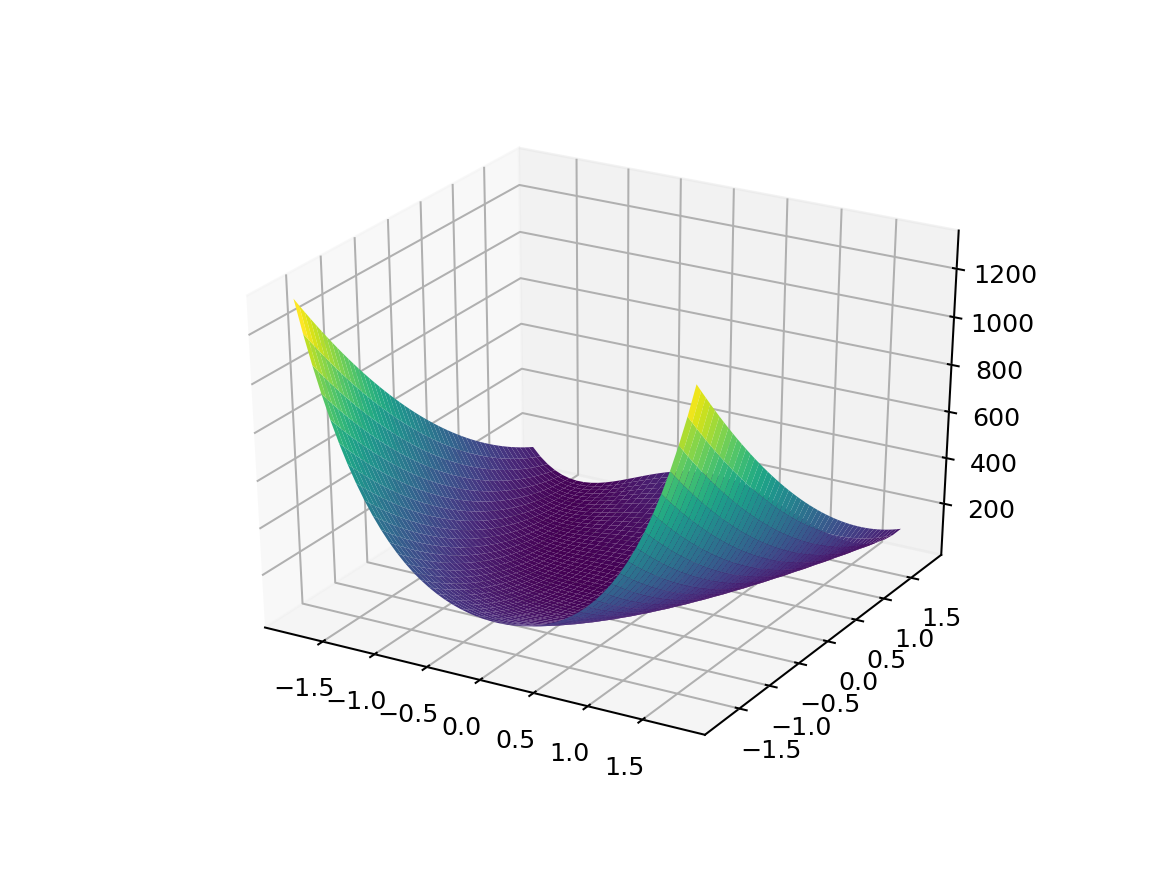

In [12]:
# Visualize the function of best fit

ymin = -1.8
ymax = 1.8
xmin = -1.8
xmax = 1.8
plot3d(f.subs([(a,swarm.bestPosition[0]),(b,swarm.bestPosition[1])]) , (x, xmin, xmax), (y, ymin, ymax));

<IPython.core.display.Javascript object>


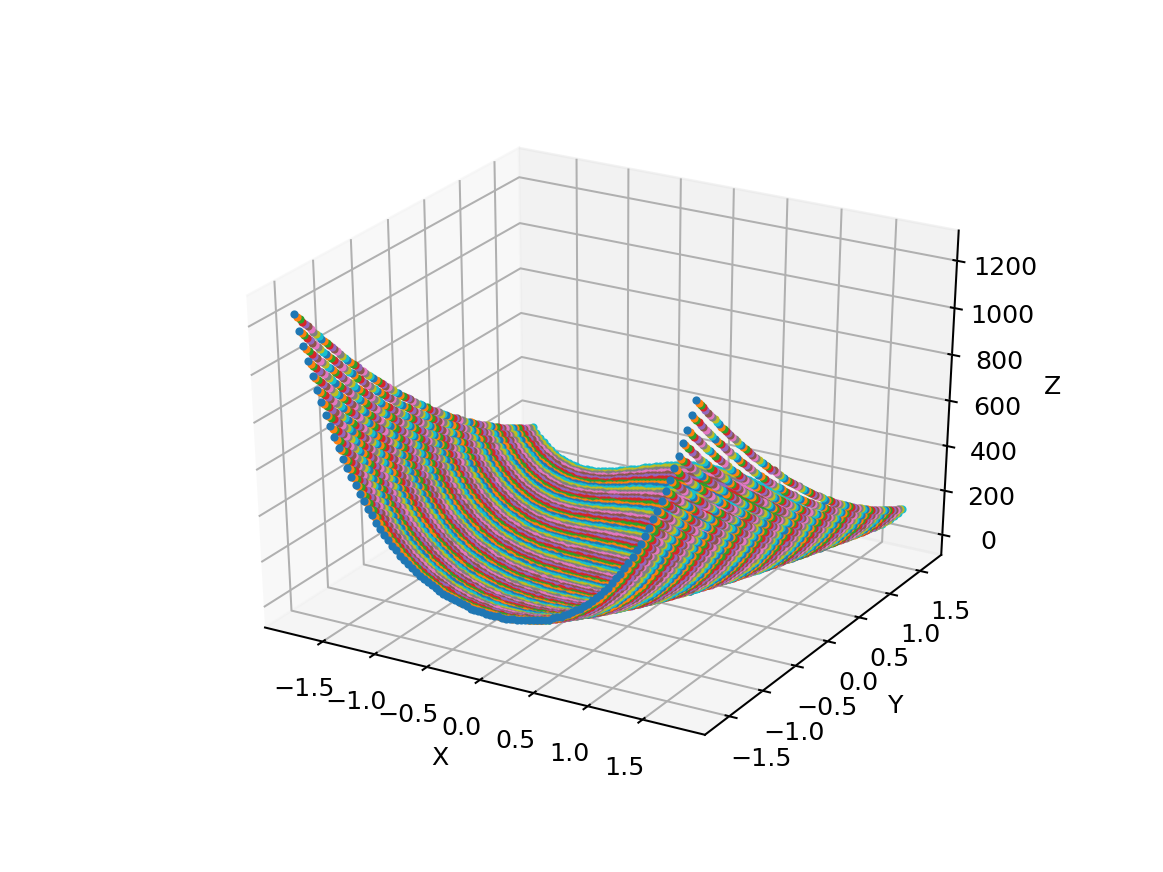

Text(0.5,0,'Z')

In [22]:
#data set plotted

fig = plt.figure()
ax = fig.gca(projection='3d')

for i in range(len(dataset)):
   xs = dataset[i,0]
   ys = dataset[i,1]
   zs = dataset[i,2]
   ax.scatter(xs, ys, zs, marker = '.')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

<IPython.core.display.Javascript object>


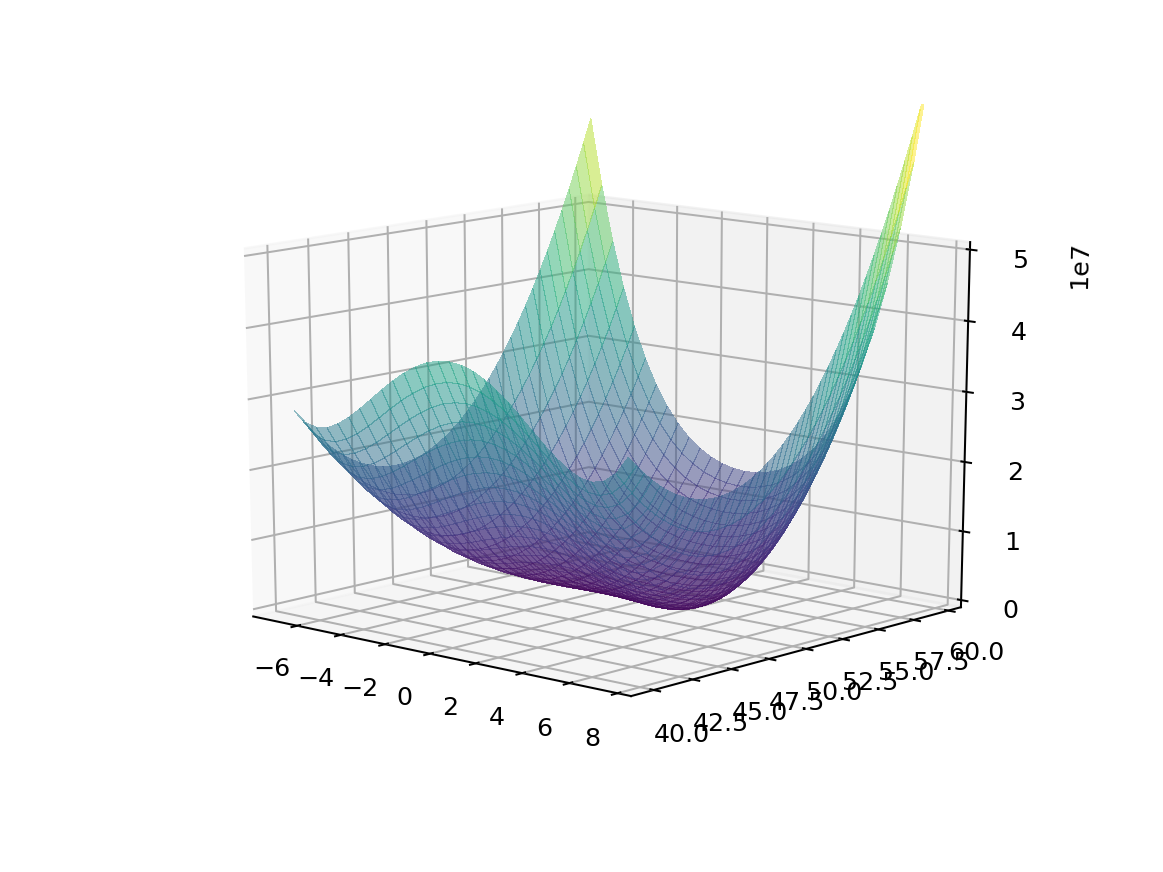

In [18]:
# Plot error over ab space

fig = plt.figure()
ax = fig.gca(projection='3d')

amin = -7
amax = 8
bmin = 40
bmax = 60

# Create surface from data
A = np.arange(amin, amax, .5)
B = np.arange(bmin, bmax, .5)
A, B = np.meshgrid(A, B)
Z = oiplib.fitness_function(A,B,dataset)

# Plot the surface.
surf = ax.plot_surface(A, B, Z, cmap = cm.viridis,
                       linewidth=0, antialiased=False)

surf.set_alpha(.5)

# Customize the z axis.
ax.set_zlim(bottom = 0, top = 5e7)


plt.show()